# Time SeriesForecasting - Semester End Exam - 80 marks

# Section A Total 20 Marks

### Q.1 Explain how will you estimate seasonality in a given time series.  (6 Marks)

### Q.2 Describe  Holt-Winters smoothing procedure. (6 Marks)

### Q.3 Discuss the properties of the ACF and PACF of time series process.. (8 Marks)

# Section B Total 30 Marks

### DATA_SET:

Analytics firm wants to forecast the sale of product for the next three quarters. For this, firm has gathered a quarterly sales data for the period of Jan 2000 to Mar 2019.

* date ==			date field	
* Sales == 	    Sales (numeric)

In [1057]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Q.1	Data preparation (5 marks)


a.	Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables? (1 MARK)

b. convert the data into time series (2 MARK)


c. Check for defects in the data such as missing values, null, etc. (1 MARK)

d. Visualize the time series using relevant plots. (1 MARK)


In [1058]:
#a. Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables? (1 MARK)

In [1059]:
df=pd.read_csv('D:\\M. Tech in Data Science & Machine Learning\\Time Series Forecasting\\Sample Paper\\Datasets\\Data_sales_tractors.csv')
df.head()#first five observations

,Month-Year,Number of Tractor Sold
0,3-Jan,141
1,3-Feb,157
2,3-Mar,185
3,3-Apr,199
4,3-May,203


In [1060]:
df.tail()#last five observations

,Month-Year,Number of Tractor Sold
139,14-Aug,848
140,14-Sep,640
141,14-Oct,581
142,14-Nov,519
143,14-Dec,605


In [1061]:
df.shape #shape of the data
#144 rows and 2 columns

(144, 2)

In [1062]:
df.info()#summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [1063]:
#"Month-Year" is categorical and "Number of Tractor Sold" is numerical

In [1064]:
#Simple EDA

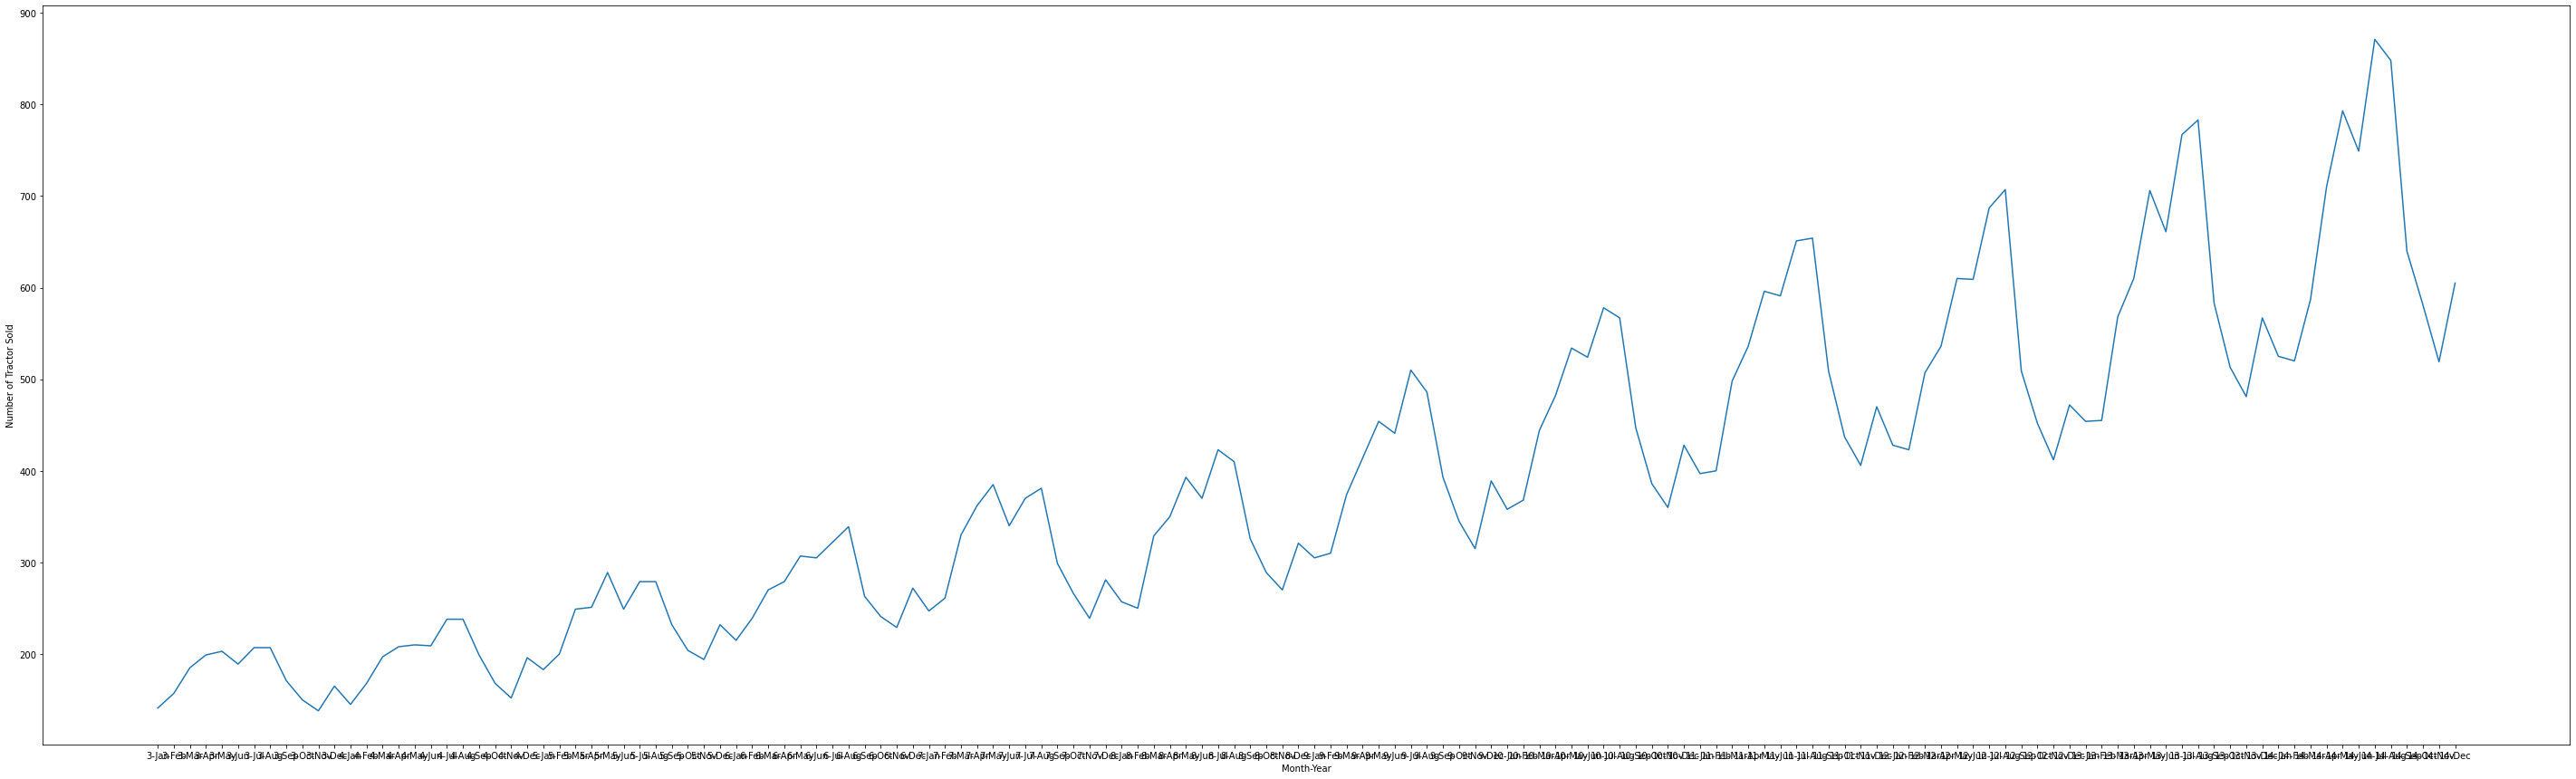

In [1065]:
plt.figure(figsize=(50,15))
sns.lineplot(df['Month-Year'],df['Number of Tractor Sold'],palette='set2')
plt.show()

In [1066]:
#With years in progress we can see that the Number of Tractor Sold also increases  

In [1067]:
#b. convert the data into time series (2 MARK)

In [1068]:
df['Month-Year']

0       3-Jan
1       3-Feb
2       3-Mar
3       3-Apr
4       3-May
        ...  
139    14-Aug
140    14-Sep
141    14-Oct
142    14-Nov
143    14-Dec
Name: Month-Year, Length: 144, dtype: object

In [1069]:
#METHOD 1

In [1070]:
Date1=pd.date_range(start='01/01/2003',end='01/01/2015',freq='M')#for example: 01/01/2015 (Month/Day/Year)
Date1

DatetimeIndex(['2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
               '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31',
               '2003-09-30', '2003-10-31',
               ...
               '2014-03-31', '2014-04-30', '2014-05-31', '2014-06-30',
               '2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31',
               '2014-11-30', '2014-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [1071]:
#METHOD 2

In [1072]:
Date2=pd.date_range(start='01/01/2003',periods=len(df),freq='M')#Once a Month
Date2

DatetimeIndex(['2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
               '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31',
               '2003-09-30', '2003-10-31',
               ...
               '2014-03-31', '2014-04-30', '2014-05-31', '2014-06-30',
               '2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31',
               '2014-11-30', '2014-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [1073]:
df['Date']=Date2#adding the new column
df=df.set_index('Date')#setting date as the default column
df=df.drop('Month-Year',axis=1)#dropping the old column

In [1074]:
df.head()#checking

,Number of Tractor Sold
Date,
2003-01-31,141
2003-02-28,157
2003-03-31,185
2003-04-30,199
2003-05-31,203


In [1075]:
#c. Check for defects in the data such as missing values, null, etc. (1 MARK)

In [1076]:
df.isnull().sum()

Number of Tractor Sold    0
dtype: int64

In [1077]:
#There are no missing values, null values in the dataset

In [1078]:
#d. Visualize the time series using relevant plots. (1 MARK)

In [1079]:
#Trend - Seasonality Plot

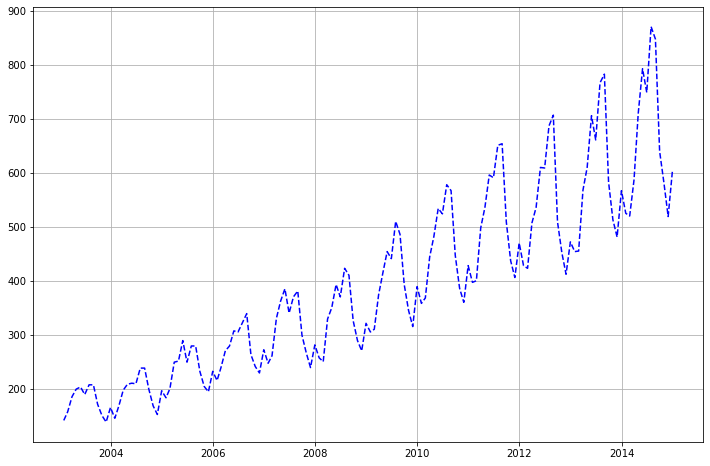

In [1080]:
plt.figure(figsize=(12,8))
plt.plot(df['Number of Tractor Sold'],'b--')
plt.grid(True)
plt.show()

In [1081]:
#Inferences:

#With years in progress we can see that the Number of Tractor Sold also increases  
#We can see that there is tred is aditive and seasonality is multiplicative in the above data

In [1082]:
#Checking or distribution of data (YEAR wise)

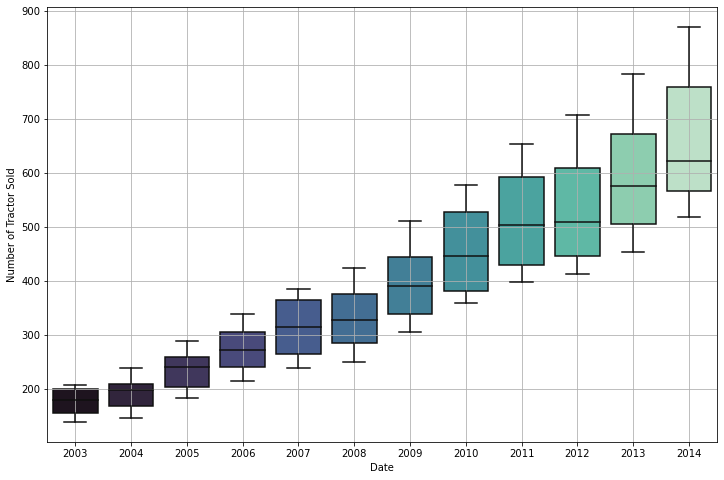

In [1083]:
plt.figure(figsize=(12,8))
sns.boxplot(df.index.year,df['Number of Tractor Sold'],palette='mako')
plt.grid(True)
plt.show()

In [1084]:
##With years in progress we can see that the Number of Tractor Sold also increases 
#(bigger the size of the box represents High variation of data in that year)

In [1085]:
#Checking or distribution of data (MONTH wise)

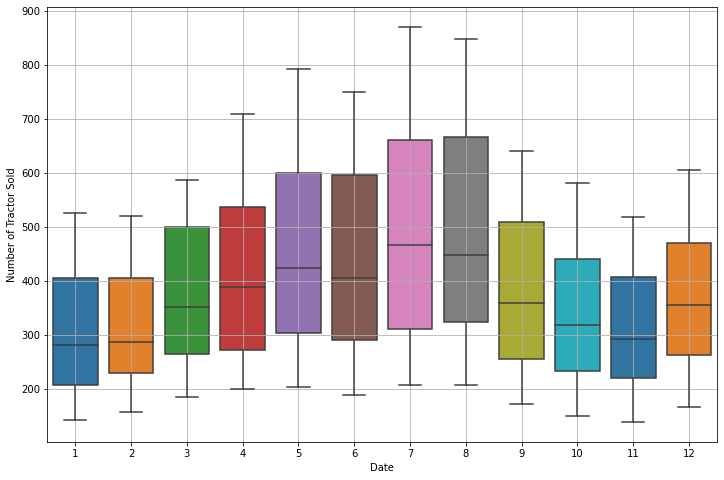

In [1086]:
plt.figure(figsize=(12,8))
sns.boxplot(df.index.month,df['Number of Tractor Sold'],palette='tab10')
plt.grid(True)
plt.show()

In [1087]:
#High variation in data can be observed in the month of July and August.

### Q.2 Data Understanding (15 marks) 

a. Decompose the time series and check for components of time series. (4 MARKS)

b. Perform dicky fuller test to check the stationarity? What other actions will you take if series is non-stationary? (3+2 MARKS)

c. Plot AutoCorrelation and Partial AutoCorrelation function? What is your inference from these plots?  (3+3 MARKS)

In [1088]:
#a. Decompose the time series and check for components of time series. (4 MARKS)

In [1089]:
from statsmodels.tsa.seasonal import seasonal_decompose

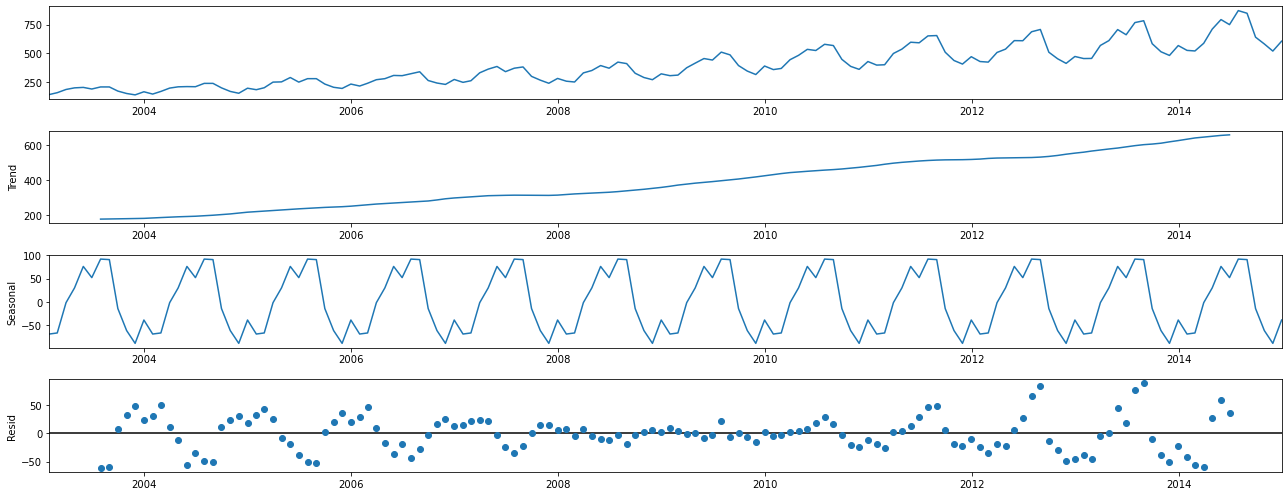

In [1090]:
plt.rcParams["figure.figsize"]=(18,7)
decomposition=seasonal_decompose(df,model='additive')
decomposition.plot();

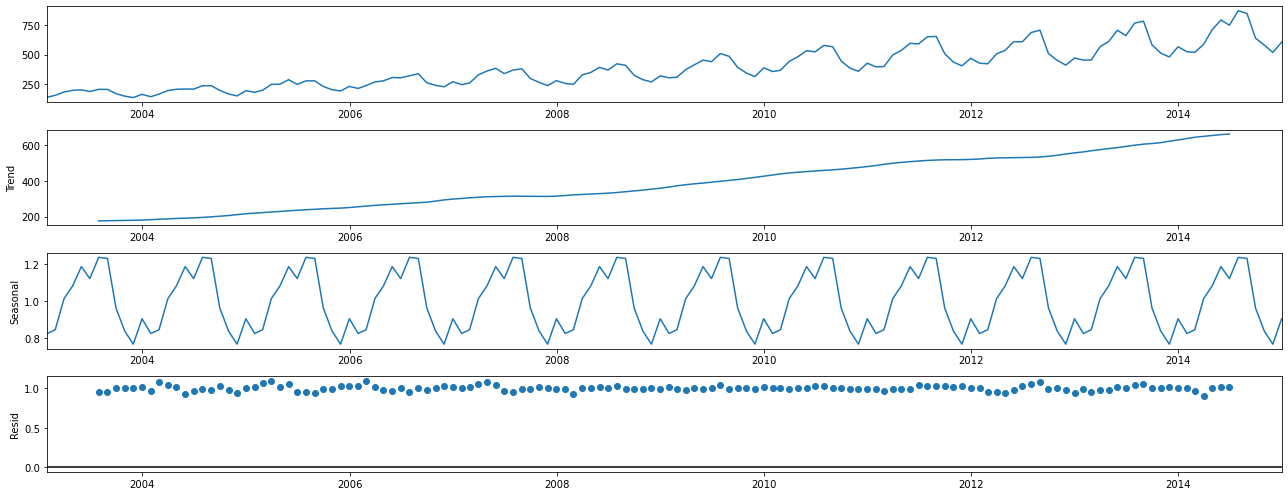

In [1091]:
decomposition=seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [1093]:
#additive:
#Trend is additive and Seasonality is also additive in nature.
#In additive model all the residuals are scattered

#Multilicative
#Even from multiplicative we can see that Trend is additive and Seasonality is additive in nature
#In Multiplicative model all the residuals lie areound the range of 1

#Since the seasonality does not change with Trend with respect to both Additive and Multiplicative,
#also the residuals lie around the range of 1, multiplicative us the best method

In [1094]:
#b. Perform dicky fuller test to check the stationarity? What other actions will you take if series is non-stationary? (3+2 MARKS)

In [1114]:
from statsmodels.tsa.stattools import  adfuller

In [1115]:
observations=df.values
#print(observations[1:5])#checking the values
test_result1=adfuller(observations)
#test_result

In [1116]:
print('ADF stastic : ',test_result1[0])#test statistic
print('pvalue  : ',test_result1[1])
print('Critical Values:')
for key,value in test_result1[4].items():#Critical values for the test statistic at the 1 %, 5 %, and 10 %
    print(key,value)

ADF stastic :  1.1088250591467386
pvalue  :  0.995291241524842
Critical Values:
1% -3.482087964046026
5% -2.8842185101614626
10% -2.578864381347275


In [1099]:
#As pvalue is grater than 0.05 thus Test result confirms that series is non-stationary

In [1100]:
#Checking for non-stationarity by plotting

Date
1     304.583333
2     312.583333
3     378.166667
4     411.416667
5     456.666667
6     436.416667
7     491.916667
8     491.583333
9     380.916667
10    336.000000
11    309.583333
12    366.500000
Name: Number of Tractor Sold, dtype: float64


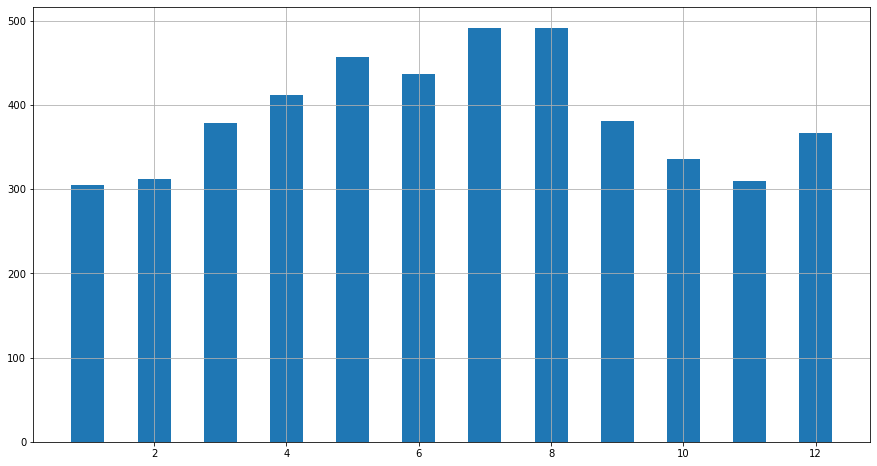

In [1101]:
monthly_mean=df.groupby(df.index.month)['Number of Tractor Sold'].agg('mean')
print(monthly_mean)
plt.figure(figsize=(15,8))
plt.bar(monthly_mean.index,monthly_mean,width=0.5)
plt.grid(True)
plt.show()

In [1102]:
#Also Variation in monthly mean plot is indicating that series is non-stationary

In [1103]:
#lets plot rolling mean and std deviation

In [1104]:
rolling_mean=df.rolling(window=15).mean()
rolling_std=df.rolling(window=15).std()

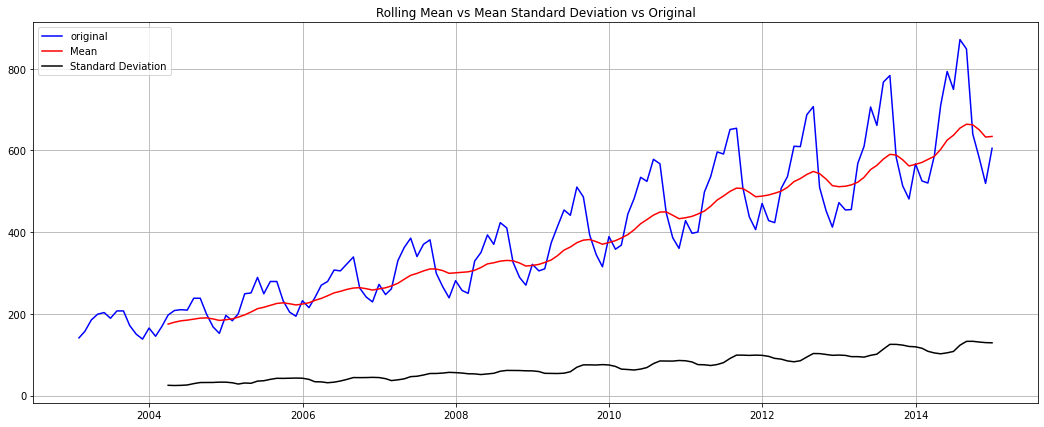

In [1105]:
original=plt.plot(df,'blue',label='original')
mean=plt.plot(rolling_mean,'red',label='Mean')
std=plt.plot(rolling_std,'black',label='Standard Deviation')
plt.legend()
plt.title('Rolling Mean vs Mean Standard Deviation vs Original')
plt.grid(True)
plt.show()

In [1106]:
#Both rolling mean and std deviation are changing over the period of time

In [1107]:
#c. Plot AutoCorrelation and Partial AutoCorrelation function? What is your inference from these plots? (3+3 MARKS)

In [1108]:
#Check the Auto Correlation funtion and Partial Auto Correlation funtion of the training data.

In [1109]:
from statsmodels.graphics.tsaplots import  plot_pacf
from statsmodels.graphics.tsaplots import  plot_acf

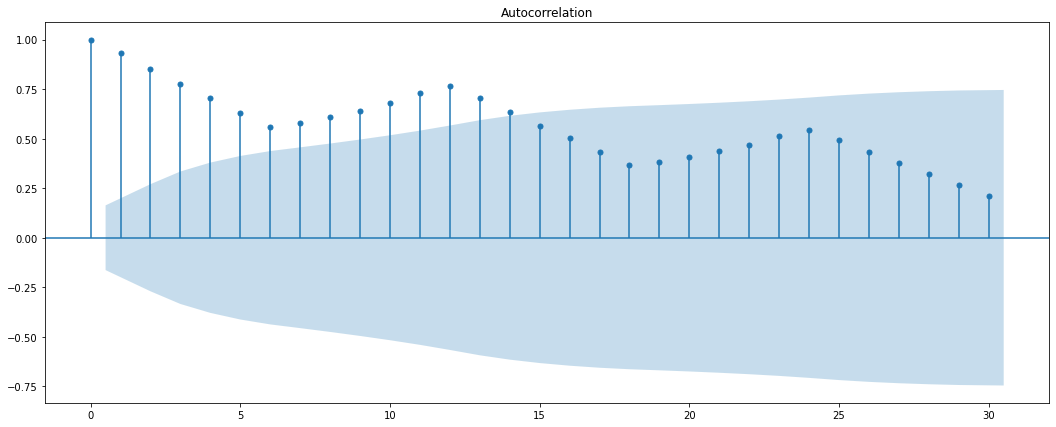

In [1110]:
plot_acf(df,lags=30);

In [1111]:
#Inferences:
#q=0 because its decaying
#ACF plot is showing gradual decay

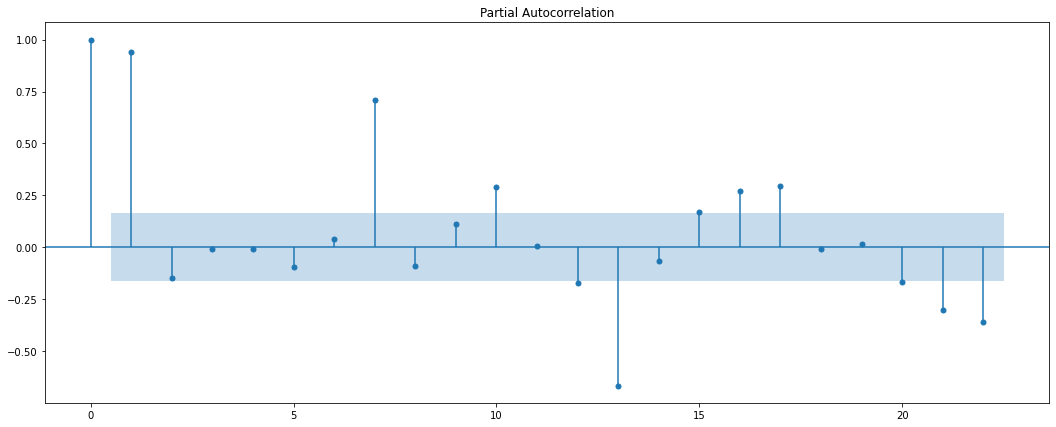

In [1112]:
plot_pacf(df);

In [767]:
#Inferences:
#whereas PACF plot cut-offs after forst two lags.

In [ ]:
#What other actions will you take if series is non-stationary?

In [1123]:
df_diff=df.diff(periods=3).dropna()
observations= df_diff.values
test_result2 = adfuller(observations)
#test_result2

In [1124]:
print('ADF stastic : ',test_result2[0])#test statistic
print('pvalue  : ',test_result2[1])
print('Critical Values:')
for key,value in test_result2[4].items():#Critical values for the test statistic at the 1 %, 5 %, and 10 %
    print(key,value)

ADF stastic :  -2.9367244688054157
pvalue  :  0.04124108615679077
Critical Values:
1% -3.4816817173418295
5% -2.8840418343195267
10% -2.578770059171598


In [ ]:
#-----------------------------------------------------------------------------------------------------------------------#

# Section C Total 30 Marks

### Q.1 Model Improvement

a. Fit exponential smoothing model and observe the residuals, RMSE and MAPE values of the model for test data. (10 MARKS)

b. How would you improve the exponential smoothing model? Make the changes and Fit the final exponential smoothing model. (10 MARKS)

c. Analyze the residuals of this final model. Feel free to use charts or graphs to explain. (5 MARKS)

d. Forecast the stock closing price for next 1 months using the final model? (5 MARKS)

In [768]:
#first Split dataset into train and test sets. Using last 1 year of data for testing.

In [769]:
#Train-Test split

In [770]:
len(df)

144

In [771]:
df.head()

,Number of Tractor Sold
Date,
2003-01-31,141
2003-02-28,157
2003-03-31,185
2003-04-30,199
2003-05-31,203


In [772]:
df.tail()

,Number of Tractor Sold
Date,
2014-08-31,848
2014-09-30,640
2014-10-31,581
2014-11-30,519
2014-12-31,605


In [773]:
from datetime import  datetime, timedelta

In [774]:
#last 1 year of data for testing.

In [775]:
train_end=datetime(2013,12,31)#(year-data-month)
test_end=datetime(2014,12,31)

In [776]:
train=df[:train_end]
test=df[train_end + timedelta(days=1):test_end]

In [777]:
train.shape

(132, 1)

In [778]:
test.shape

(12, 1)

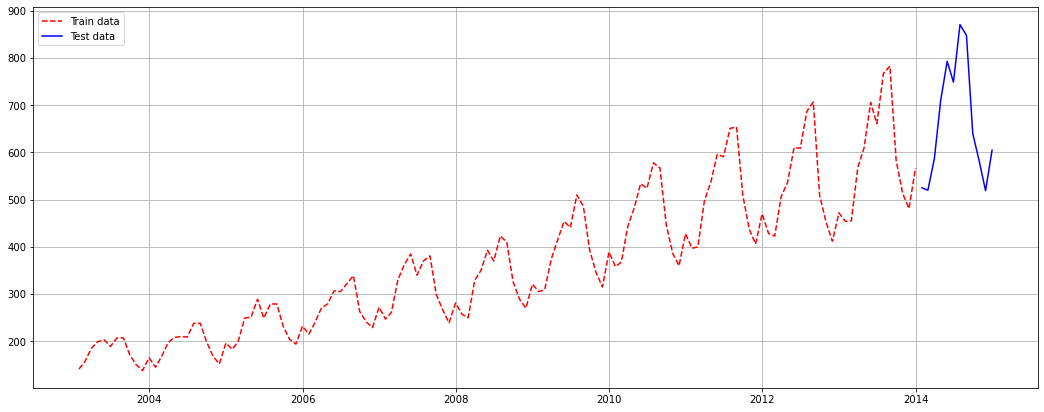

In [779]:
#plotting train and test data
plt.plot(train,'r--',label='Train data')
plt.plot(test,'b',label='Test data')
plt.legend()
plt.grid(True)
plt.show()

In [780]:
#a. Fit exponential smoothing model and observe the residuals, RMSE and MAPE values of the model for test data. (10 MARKS)

In [781]:
from  statsmodels.tsa.api import SimpleExpSmoothing

In [782]:
#1. Simple exponential smoothing model 

In [783]:
model_SES = SimpleExpSmoothing(train)

In [784]:
model_SES_fit = model_SES.fit(optimized=True)#Estimate model parameters by maximizing the log-likelihood.

In [785]:
model_SES_fit.summary()

Dep. Variable:,Number of Tractor Sold,No. Observations:,132
Model:,SimpleExpSmoothing,SSE,358460.793
Optimized:,True,AIC,1047.694
Trend:,None,BIC,1053.460
Seasonal:,None,AICC,1048.009
Seasonal Periods:,None,Date:,"Thu, 23 Sep 2021"
Box-Cox:,False,Time:,19:33:11
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,141.00000,l.0,True


In [786]:
model_SES_predict=model_SES_fit.forecast(steps=len(test)) #predicting on the lengeth of the test data
#model_SES_predict

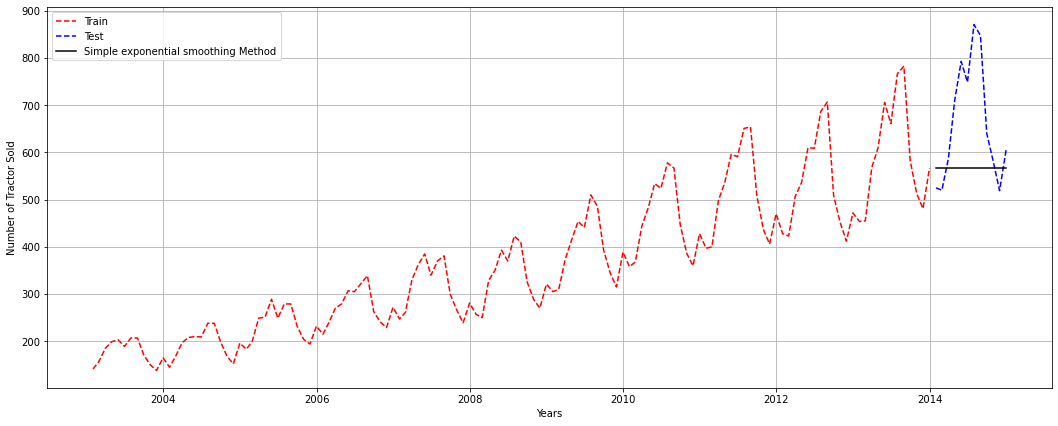

In [787]:
# Plotting time searies and forecasts
plt.plot(train,'r--' ,label='Train')
plt.plot(test, 'b--',label='Test')
plt.plot(model_SES_predict,'black',label='Simple exponential smoothing Method')
plt.xlabel('Years')
plt.ylabel('Number of Tractor Sold')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [788]:
#Calculationg RMSE and MAPE

In [789]:
from sklearn.metrics import  mean_squared_error

In [790]:
rmse1 = mean_squared_error(test['Number of Tractor Sold'],model_SES_predict, squared=False)#squared: If True returns MSE value, if False returns RMSE value.
print('RMSE for the Simple exponential smoothing model:',rmse1)

RMSE for the Simple exponential smoothing model: 155.63209816593647


In [791]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [792]:
mape1=MAPE(test['Number of Tractor Sold'],model_SES_predict)
print('MAPE for the Simple exponential smoothing model:',mape1)

MAPE for the Simple exponential smoothing model: 15.923275213237762


In [793]:
#MPAE less than or equal to 10% is considered to be execellent
#MPAE less than or equal to 20% is considered to be good

In [794]:
#2.Double Exponential Smoothing / Holt's linear Method

In [795]:
from  statsmodels.tsa.api import Holt

In [796]:
model_DES=Holt(train,exponential=True,initialization_method='estimated')
#exponential :Type of trend component.
#initialization_method:Default is 'estimated'

In [797]:
model_DES_fit=model_DES.fit(optimized=True)

In [798]:
model_DES_fit.summary()

Dep. Variable:,Number of Tractor Sold,No. Observations:,132
Model:,Holt,SSE,359293.990
Optimized:,True,AIC,1052.000
Trend:,Multiplicative,BIC,1063.532
Seasonal:,None,AICC,1052.672
Seasonal Periods:,None,Date:,"Thu, 23 Sep 2021"
Box-Cox:,False,Time:,19:33:22
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950616,alpha,True
smoothing_trend,9.8773e-05,beta,True


In [799]:
model_DES_predict=model_DES_fit.forecast(steps=len(test)) #predicting on the lengeth of the test data
#model_SES_predict

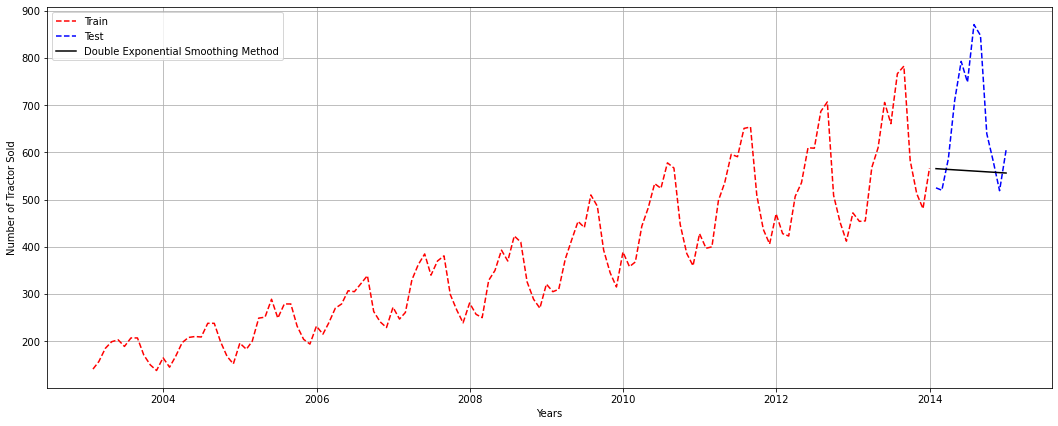

In [800]:
# Plotting time searies and forecasts
plt.plot(train,'r--' ,label='Train')
plt.plot(test, 'b--',label='Test')
plt.plot(model_DES_predict,'black',label='Double Exponential Smoothing Method')
plt.xlabel('Years')
plt.ylabel('Number of Tractor Sold')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [802]:
rmse2 = mean_squared_error(test['Number of Tractor Sold'],model_DES_predict, squared=False)#squared: If True returns MSE value, if False returns RMSE value.
print('RMSE for the Double Exponential Smoothing model:',rmse2)

RMSE for the Double Exponential Smoothing model: 159.2705600824482


In [803]:
mape2=MAPE(test['Number of Tractor Sold'],model_DES_predict)
print('MAPE for the Double Exponential Smoothing model:',mape2)

MAPE for the Double Exponential Smoothing model: 16.39305844801266


In [804]:
#3.Triple Exponential Smoothing / Holt-Winters Method

In [805]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
#trend : Type of trend component.
#seasonal: Type of seasonal component.

In [806]:
model_TES_fit=model_TES.fit(optimized=True)

In [807]:
model_TES_fit.summary()

Dep. Variable:,Number of Tractor Sold,No. Observations:,132
Model:,ExponentialSmoothing,SSE,40223.987
Optimized:,True,AIC,786.963
Trend:,Additive,BIC,833.088
Seasonal:,Additive,AICC,793.016
Seasonal Periods:,12,Date:,"Thu, 23 Sep 2021"
Box-Cox:,False,Time:,19:33:40
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2396585,alpha,True
smoothing_trend,5.0216e-05,beta,True


In [808]:
model_TES_predict=model_TES_fit.forecast(steps=len(test)) #predicting on the lengeth of the test data
#model_TES_predict

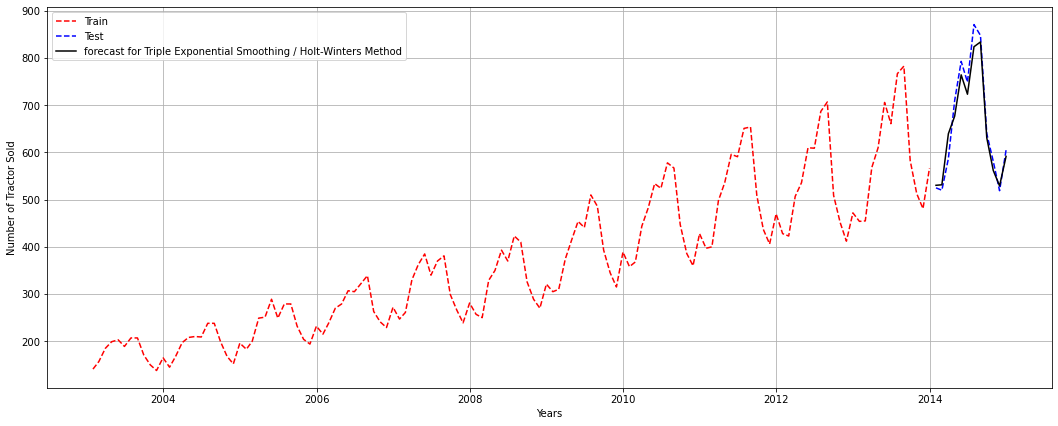

In [809]:
# Plotting time searies and forecasts
plt.plot(train,'r--' ,label='Train')
plt.plot(test, 'b--',label='Test')
plt.plot(model_TES_predict,'black',label='forecast for Triple Exponential Smoothing / Holt-Winters Method')
plt.xlabel('Years')
plt.ylabel('Number of Tractor Sold')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [810]:
rmse3 = mean_squared_error(test['Number of Tractor Sold'],model_TES_predict, squared=False)#squared: If True returns MSE value, if False returns RMSE value.
print('RMSE for the Triple Exponential Smoothing / Holt-Winters model:',rmse3)

RMSE for the Triple Exponential Smoothing / Holt-Winters model: 26.80866476523806


In [811]:
mape3=MAPE(test['Number of Tractor Sold'],model_TES_predict)
print('MAPE for the Triple Exponential Smoothing / Holt-Winters model:',mape3)

MAPE for the Triple Exponential Smoothing / Holt-Winters model: 3.314344538062483


In [862]:
#b. How would you improve the exponential smoothing model? 
    #Make the changes and Fit the final exponential smoothing model. (10 MARKS)

In [863]:
#We will try to imporve the Triple Exponential Smoothing / Holt-Winters model

In [936]:
model_TES1 = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
#trend : Type of trend component.
#seasonal: Type of seasonal component.

In [937]:
model_TES_fit1=model_TES1.fit(optimized=True, smoothing_level=0.60,smoothing_seasonal=0.9)

In [938]:
model_TES_fit1.summary()

Dep. Variable:,Number of Tractor Sold,No. Observations:,132
Model:,ExponentialSmoothing,SSE,39491.760
Optimized:,True,AIC,784.538
Trend:,Additive,BIC,830.663
Seasonal:,Additive,AICC,790.591
Seasonal Periods:,12,Date:,"Thu, 23 Sep 2021"
Box-Cox:,False,Time:,19:38:13
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6000000,alpha,False
smoothing_trend,0.000000,beta,True


In [939]:
model_TES_predict1=model_TES_fit1.forecast(steps=len(test)) #predicting on the lengeth of the test data
#model_TES_predict1

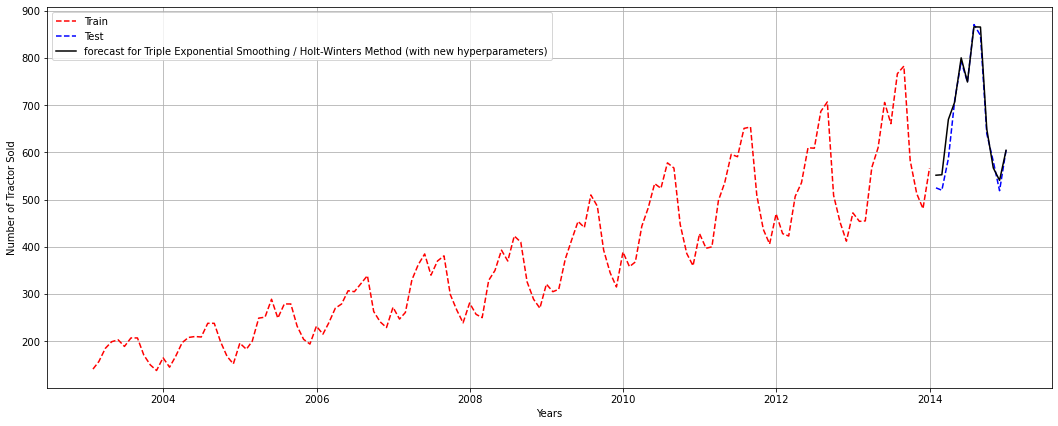

In [940]:
# Plotting time searies and forecasts
plt.plot(train,'r--' ,label='Train')
plt.plot(test, 'b--',label='Test')
plt.plot(model_TES_predict1,'black',label='forecast for Triple Exponential Smoothing / Holt-Winters Method (with new hyperparameters)')
plt.xlabel('Years')
plt.ylabel('Number of Tractor Sold')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [941]:
rmse4 = mean_squared_error(test['Number of Tractor Sold'],model_TES_predict1, squared=False)#squared: If True returns MSE value, if False returns RMSE value.
print('RMSE for the Triple Exponential Smoothing / Holt-Winters model:',rmse4)

RMSE for the Triple Exponential Smoothing / Holt-Winters model: 28.625182920748095


In [942]:
mape4=MAPE(test['Number of Tractor Sold'],model_TES_predict1)
print('MAPE for the Triple Exponential Smoothing / Holt-Winters model:',mape4)

MAPE for the Triple Exponential Smoothing / Holt-Winters model: 3.1451323935502575


In [943]:
#Inference : in the above improved model we can see that the forecast is looks more accurate than the rest of the models

In [944]:
#c. Analyze the residuals of this final model. Feel free to use charts or graphs to explain. (5 MARKS)

In [945]:
#printing residuals of the final model

In [946]:
from statsmodels.graphics.gofplots import qqplot

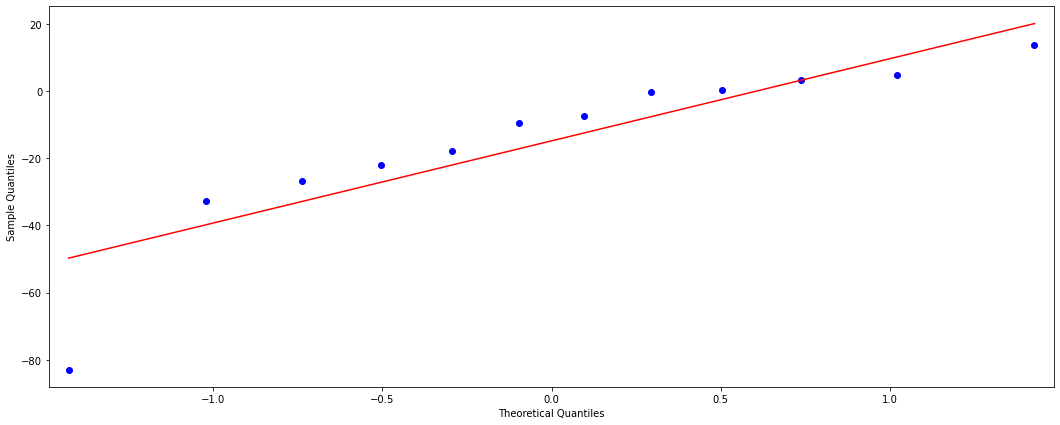

In [947]:
residuals = test['Number of Tractor Sold'] - model_TES_predict1
qqplot(residuals,line='s')
#line :Options for the reference line to which the data is compared:
#"s" - standardized line, the expected order statistics are scaled
plt.show()

In [948]:
#Inference:

#when the obseravtions are on the line, the model is underfitted
#when the obseravtions are on farway from the line, the model is overfitted

#As most of the obseravtion are close to the line we can say the model is good
#There is one outlier which can been seen

In [949]:
#d. Forecast the "Number of Tractor Sold" for next 2 months using the final model? (5 MARKS)

In [950]:
#Forecast for 2 months

In [951]:
#We will be using full data(train and test) to predict an unseen data for 2 months

In [952]:
data=df#taking the whole dataset

In [953]:
data.shape#shape

(144, 1)

In [954]:
model_TES2 = ExponentialSmoothing(data,trend='additive',seasonal='additive',initialization_method='estimated')
#trend : Type of trend component.
#seasonal: Type of seasonal component.

In [955]:
model_TES_fit2=model_TES2.fit(optimized=True, smoothing_level=0.60,smoothing_seasonal=0.9)

In [956]:
forecast=model_TES_fit2.forecast(steps=2)# 2 month of unseen data to forecast

In [957]:
forecast#forecast values

2015-01-31    557.742294
2015-02-28    567.567594
Freq: M, dtype: float64

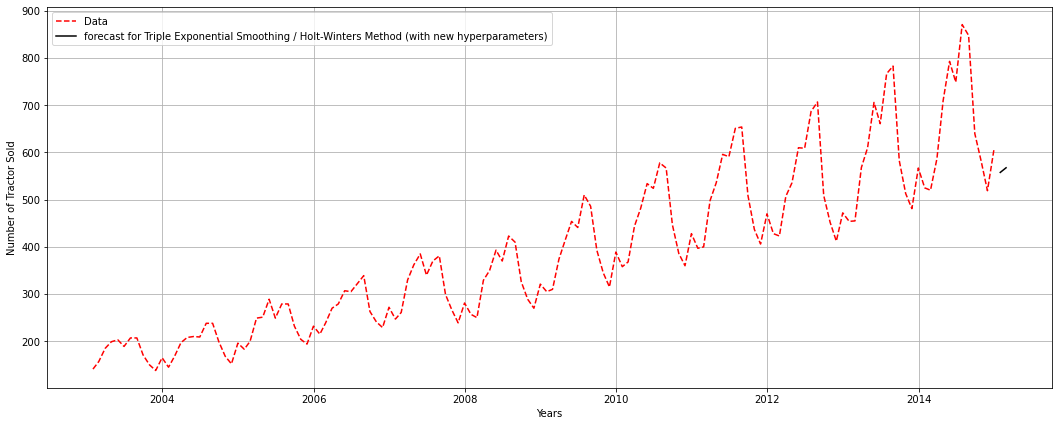

In [958]:
# Plotting time searies and forecasts
plt.plot(data,'r--' ,label='Data')
plt.plot(forecast,'black',label='forecast for Triple Exponential Smoothing / Holt-Winters Method (with new hyperparameters)')
plt.xlabel('Years')
plt.ylabel('Number of Tractor Sold')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [959]:
#-----------------------------------------------------END---------------------------------------------------------------#

In [960]:
#Additional Questions


### 3.	Model Building (20 marks)

a.	Fit a base model and observe the residuals, RMSE and MAPE values of the model. Please comment on whether it is good or not.  (5 marks)

c.	How would you improve the model? What changes you will make in the base model. Fit the final model.   (10 marks)

d.	Analyze the residuals of final model. Feel free to use charts or graphs to explain. (2 marks) 

e.	Forecast the mean temperature for next 1 months using the final model? (3 marks)


In [961]:
#a. Fit a base model and observe the residuals, RMSE and MAPE values of the model. Please comment on whether it is good or not. (5 marks)

In [962]:
#ARIMA (AutoRegressive Integrated Moving Average)

In [963]:
import itertools

In [964]:
#As per pacf plot considered p=2

In [965]:
p=q=range(0,3)
d=range(0,3)#differencing
pdq=list(itertools.product(p,d,q))
print('Some Parameters combination')
for i in range(1,len(pdq)):
    print('Model :', pdq[i])

Some Parameters combination
Model : (0, 0, 1)
Model : (0, 0, 2)
Model : (0, 1, 0)
Model : (0, 1, 1)
Model : (0, 1, 2)
Model : (0, 2, 0)
Model : (0, 2, 1)
Model : (0, 2, 2)
Model : (1, 0, 0)
Model : (1, 0, 1)
Model : (1, 0, 2)
Model : (1, 1, 0)
Model : (1, 1, 1)
Model : (1, 1, 2)
Model : (1, 2, 0)
Model : (1, 2, 1)
Model : (1, 2, 2)
Model : (2, 0, 0)
Model : (2, 0, 1)
Model : (2, 0, 2)
Model : (2, 1, 0)
Model : (2, 1, 1)
Model : (2, 1, 2)
Model : (2, 2, 0)
Model : (2, 2, 1)
Model : (2, 2, 2)


In [966]:
dfObj1 = pd.DataFrame(columns=['param', 'AIC'])
dfObj1#creating a Dataframe

,param,AIC


In [967]:
from statsmodels.tsa.arima_model import ARIMA

In [968]:
for param in pdq:
            try:
                mod=ARIMA(train,order=param)
                result_ARIMA=mod.fit()
                print('ARIMA : ',param,' - ','AIC :',result_ARIMA.aic)
                dfObj1=dfObj1.append({'param':param,'AIC':result_ARIMA.aic},ignore_index=True)
    
            except:
                continue

ARIMA :  (0, 0, 0)  -  AIC : 1705.0141615015973
ARIMA :  (0, 0, 1)  -  AIC : 1555.0141458275232
ARIMA :  (0, 0, 2)  -  AIC : 1480.8049037488224
ARIMA :  (0, 1, 0)  -  AIC : 1411.8262908585216
ARIMA :  (0, 1, 1)  -  AIC : 1410.2167426884685
ARIMA :  (0, 1, 2)  -  AIC : 1412.138347511659
ARIMA :  (0, 2, 0)  -  AIC : 1468.5206197242885
ARIMA :  (0, 2, 1)  -  AIC : 1408.9468595149076
ARIMA :  (0, 2, 2)  -  AIC : 1407.0482614127745
ARIMA :  (1, 0, 0)  -  AIC : 1424.1840985425695
ARIMA :  (1, 0, 1)  -  AIC : 1421.23269116627
ARIMA :  (1, 0, 2)  -  AIC : 1423.1478154125973
ARIMA :  (1, 1, 0)  -  AIC : 1410.5350686454244
ARIMA :  (1, 1, 1)  -  AIC : 1398.022301479889
ARIMA :  (1, 1, 2)  -  AIC : 1396.9350047198932
ARIMA :  (1, 2, 0)  -  AIC : 1450.9353012745376
ARIMA :  (1, 2, 1)  -  AIC : 1407.3318184272857
ARIMA :  (1, 2, 2)  -  AIC : 1394.9631672860232
ARIMA :  (2, 0, 0)  -  AIC : 1421.2592735442774
ARIMA :  (2, 0, 1)  -  AIC : 1423.176526203064
ARIMA :  (2, 0, 2)  -  AIC : 1425.10526530509

In [969]:
dfObj1.sort_values(by=['AIC'],ascending=True)

,param,AIC
23,"(2, 1, 2)",1381.076068
22,"(2, 1, 1)",1384.691129
17,"(1, 2, 2)",1394.963167
14,"(1, 1, 2)",1396.935005
26,"(2, 2, 2)",1396.962166
13,"(1, 1, 1)",1398.022301
8,"(0, 2, 2)",1407.048261
16,"(1, 2, 1)",1407.331818
25,"(2, 2, 1)",1408.822157
7,"(0, 2, 1)",1408.946860


In [970]:
#with the parameters (2, 1, 2) AIC is the least
#with leat AIC model is chossed to be the best

In [971]:
model = ARIMA(train,order=(2,1,2))
results_ARIMA=model.fit()
print(results_ARIMA.summary())

                                ARIMA Model Results                                 
Dep. Variable:     D.Number of Tractor Sold   No. Observations:                  131
Model:                       ARIMA(2, 1, 2)   Log Likelihood                -684.538
Method:                             css-mle   S.D. of innovations             44.231
Date:                      Thu, 23 Sep 2021   AIC                           1381.076
Time:                              19:38:58   BIC                           1398.327
Sample:                          02-28-2003   HQIC                          1388.086
                               - 12-31-2013                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.5483      0.344     10.301      0.000       2.873       4.223
ar.L1.D.Number of Tract

In [972]:
#Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE

In [1003]:
ARIMA_pred=results_ARIMA.forecast(steps=len(test))[0]#predicting on the lengeth of the test data
#ARIMA_pred

In [1004]:
ARIMA_pred

array([611.3233667 , 593.07916283, 610.73244839, 606.91095164,
       615.35003949, 616.41429238, 621.66331559, 624.37791771,
       628.51967708, 631.78970902, 635.54594497, 639.00202477])

In [1005]:
rmse5 = mean_squared_error(test['Number of Tractor Sold'],ARIMA_pred, squared=False)#squared: If True returns MSE value, if False returns RMSE value.
print('RMSE for ARIMA model:',rmse5)

RMSE for ARIMA model: 129.98315667423


In [1006]:
mape5=MAPE(test['Number of Tractor Sold'],ARIMA_pred)
print('MAPE for the Triple Exponential Smoothing / Holt-Winters model:',mape5)

MAPE for the Triple Exponential Smoothing / Holt-Winters model: 15.23095061399877


In [1007]:
test.index#the dates for which we have predicted

DatetimeIndex(['2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

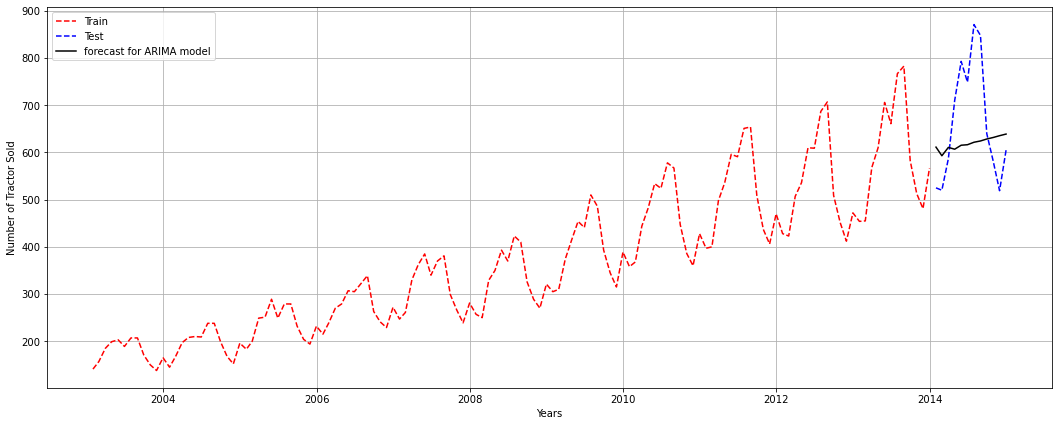

In [1009]:
# Plotting time searies and forecasts
plt.plot(train,'r--' ,label='Train')
plt.plot(test, 'b--',label='Test')
plt.plot(test.index,ARIMA_pred,'black',label='forecast for ARIMA model')
plt.xlabel('Years')
plt.ylabel('Number of Tractor Sold')
plt.grid(True)
plt.legend(loc='best')
plt.show()

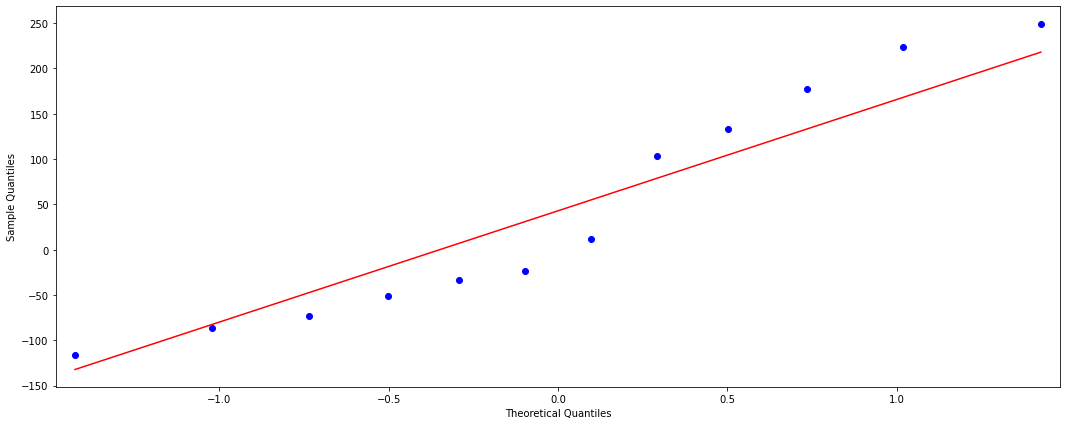

In [1012]:
residuals_ARIMA = test['Number of Tractor Sold'] - ARIMA_pred
qqplot(residuals_ARIMA,line='s')
plt.show()

In [1013]:
#Inference:

#when the obseravtions are on the line, the model is underfitted
#when the obseravtions are on farway from the line, the model is overfitted

#As most of the obseravtion are little away from to the line we can say the model is not that good

In [1014]:
#SARIMA (seasonal autoregressive integrated moving average)

In [ ]:
#Now to include seasonality, we will use SARIMA model

In [1015]:
#we will find the model parameters based on AIC criteria. 
#Parameters will be generated using combination for the given range.

In [1042]:
import itertools
p = q = range(0, 3)
d= range(0,3)
pdq = list(itertools.product(p, d, q))
#print(pdq)

In [1037]:
model_pdq=[(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [1038]:
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])#creating dataframe
dfObj2

,param,seasonal,AIC


In [1039]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [1041]:
for param in pdq:
    for param_seasonal in model_pdq:
        model=sm.tsa.statespace.SARIMAX(train,
                                order=param,#The (p,d,q) order of the model for the number of AR parameters,
                                seasonal_order=param_seasonal,#The (P,D,Q,s) order of the seasonal component of the model for the
                                enforce_stationarity=False,
                                enforce_invertibility=False)
        results_SARIMA=model.fit()
        print('SARIMA',param,param_seasonal,'12',' - ','AIC',results_SARIMA.aic)
        dfObj2=dfObj2.append({'param':param,'seasonal':param_seasonal,'AIC': results_SARIMA.aic},ignore_index=True)

SARIMA (0, 0, 0) (0, 0, 0, 12) 12  -  AIC 1941.3155373396914
SARIMA (0, 0, 0) (0, 0, 1, 12) 12  -  AIC 1654.5220889077598
SARIMA (0, 0, 0) (0, 0, 2, 12) 12  -  AIC 1414.0895573549114
SARIMA (0, 0, 0) (0, 1, 0, 12) 12  -  AIC 1264.3381964547254
SARIMA (0, 0, 0) (0, 1, 1, 12) 12  -  AIC 1114.283710256
SARIMA (0, 0, 0) (0, 1, 2, 12) 12  -  AIC 969.9106917227369
SARIMA (0, 0, 0) (0, 2, 0, 12) 12  -  AIC 1072.052633158933
SARIMA (0, 0, 0) (0, 2, 1, 12) 12  -  AIC 897.9955160119832
SARIMA (0, 0, 0) (0, 2, 2, 12) 12  -  AIC 784.211756227031
SARIMA (0, 0, 0) (1, 0, 0, 12) 12  -  AIC 1102.5152639100777
SARIMA (0, 0, 0) (1, 0, 1, 12) 12  -  AIC 1090.2441273018442
SARIMA (0, 0, 0) (1, 0, 2, 12) 12  -  AIC 986.3612208398808
SARIMA (0, 0, 0) (1, 1, 0, 12) 12  -  AIC 1077.3066159571079
SARIMA (0, 0, 0) (1, 1, 1, 12) 12  -  AIC 1006.845002961915
SARIMA (0, 0, 0) (1, 1, 2, 12) 12  -  AIC 872.8632805386095
SARIMA (0, 0, 0) (1, 2, 0, 12) 12  -  AIC 925.9046504493592
SARIMA (0, 0, 0) (1, 2, 1, 12) 12  - 

In [1043]:
dfObj2.sort_values('AIC',ascending=True)

,param,seasonal,AIC
224,"(0, 2, 2)","(0, 2, 2, 12)",660.407478
467,"(1, 2, 2)","(0, 2, 2, 12)",662.143344
710,"(2, 2, 2)","(0, 2, 2, 12)",664.143171
143,"(0, 1, 2)","(0, 2, 2, 12)",664.449883
233,"(0, 2, 2)","(1, 2, 2, 12)",665.151445
...,...,...,...
28,"(0, 0, 1)","(0, 0, 1, 12)",1489.937873
54,"(0, 0, 2)","(0, 0, 0, 12)",1631.216675
1,"(0, 0, 0)","(0, 0, 1, 12)",1654.522089
27,"(0, 0, 1)","(0, 0, 0, 12)",1759.250684


In [1044]:
model2 = sm.tsa.statespace.SARIMAX(train,
                                order=(0,2,2),#The (p,d,q) order of the model for the number of AR parameters,
                                seasonal_order=(0,2,2,12),#The (P,D,Q,s) order of the seasonal component of the model for the
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA=model2.fit()
print(results_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:             Number of Tractor Sold   No. Observations:                  132
Model:             SARIMAX(0, 2, 2)x(0, 2, 2, 12)   Log Likelihood                -325.204
Date:                            Thu, 23 Sep 2021   AIC                            660.407
Time:                                    21:27:26   BIC                            672.255
Sample:                                01-31-2003   HQIC                           665.154
                                     - 12-31-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.2858    336.288     -0.004      0.997    -660.398     657.827
ma.L2          0.2858     96.141   

In [ ]:
#Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE

In [1048]:
SARIMA_pred=results_SARIMA.forecast(steps=len(test))#predicting on the lengeth of the test data
#SARIMA_pred

In [1049]:
SARIMA_pred

2014-01-31    534.960387
2014-02-28    531.491308
2014-03-31    647.659317
2014-04-30    691.267215
2014-05-31    790.612226
2014-06-30    759.454283
2014-07-31    865.162935
2014-08-31    882.223364
2014-09-30    665.988996
2014-10-31    592.579483
2014-11-30    555.842211
2014-12-31    641.144981
Freq: M, Name: predicted_mean, dtype: float64

In [1050]:
rmse6 = mean_squared_error(test['Number of Tractor Sold'],SARIMA_pred, squared=False)#squared: If True returns MSE value, if False returns RMSE value.
print('RMSE for SARIMA model:',rmse6)

RMSE for SARIMA model: 27.470216469357787


In [1051]:
mape6=MAPE(test['Number of Tractor Sold'],SARIMA_pred)
print('MAPE for SARIMA model:',mape6)

MAPE for SARIMA model: 3.5507473025928395


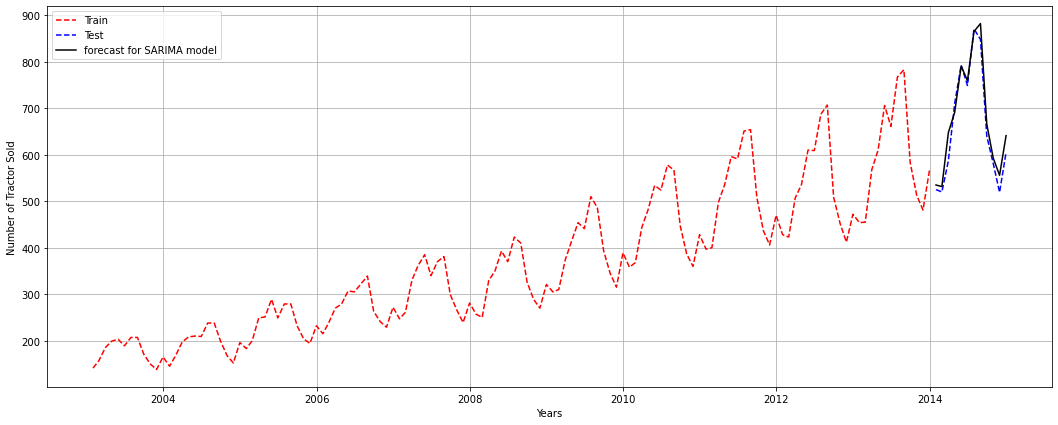

In [1053]:
# Plotting time searies and forecasts
plt.plot(train,'r--' ,label='Train')
plt.plot(test, 'b--',label='Test')
plt.plot(SARIMA_pred,'black',label='forecast for SARIMA model')
plt.xlabel('Years')
plt.ylabel('Number of Tractor Sold')
plt.grid(True)
plt.legend(loc='best')
plt.show()

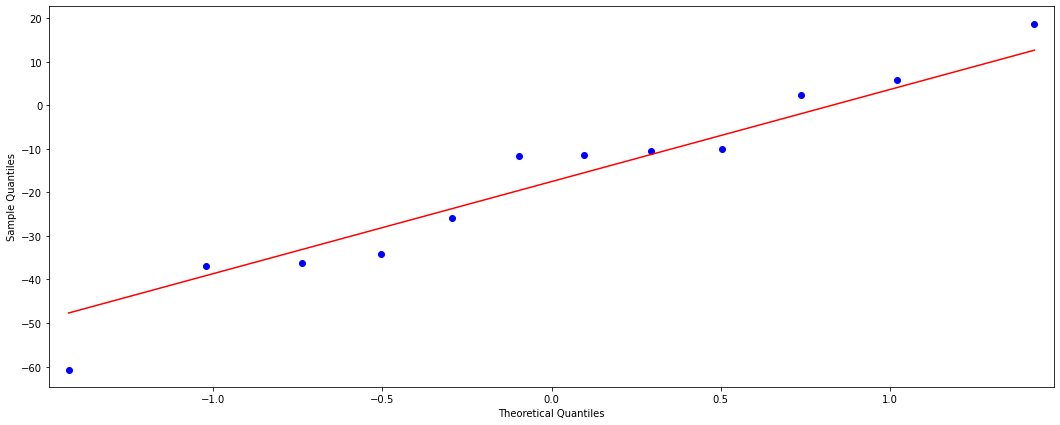

In [1054]:
residuals_SARIMA = test['Number of Tractor Sold'] - SARIMA_pred
qqplot(residuals_SARIMA,line='s')
plt.show()

In [1055]:
#Inference:

#when the obseravtions are on the line, the model is underfitted
#when the obseravtions are on farway from the line, the model is overfitted

#As most of the obseravtion are close to the line we can say the model is little better

In [ ]:
#----------------------------------------------------------------------END-----------------------------------------#